# U.S. Oil and Gas Production Analysis

Analyzing the [Kaggle Dataset](https://www.kaggle.com/djzurawski/us-oil-and-gas-production-june-2008-to-june-2018) with information about Oil and Gas production in the US from June 2008 to June 2018.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
file = "data/U.S._natural_gas_production.csv"
gas_df = pd.read_csv(file, decimal=",")
gas_df.head(3)

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881


In [6]:
# DataFrame'de kaç satır ve kaç sütun olduğunu kontrol et
gas_df.shape

(121, 20)

In [7]:
# DataFrame'de mevcut olan tüm sütun adlarını göster
gas_df.columns

Index(['Month', 'U.S.', 'Alaska', 'Arkansas', 'Kansas', 'Other States',
       'Federal Offshore--Gulf of Mexico', 'Wyoming', 'West Virginia', 'Utah',
       'Pennsylvania', 'Texas', 'Oklahoma', 'Ohio', 'North Dakota',
       'New Mexico', 'Montana', 'Louisiana', 'Colorado', 'California'],
      dtype='object')

In [8]:
# Her sütun hakkında veri türü ve null olmayan değer sayısı gibi ek bilgiler göster
gas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Month                             121 non-null    object
 1   U.S.                              121 non-null    int64 
 2   Alaska                            121 non-null    int64 
 3   Arkansas                          121 non-null    int64 
 4   Kansas                            121 non-null    int64 
 5   Other States                      121 non-null    int64 
 6   Federal Offshore--Gulf of Mexico  121 non-null    int64 
 7   Wyoming                           121 non-null    int64 
 8   West Virginia                     121 non-null    int64 
 9   Utah                              121 non-null    int64 
 10  Pennsylvania                      121 non-null    int64 
 11  Texas                             121 non-null    int64 
 12  Oklahoma              

In [10]:
# 'Month' sütununu datetime formatına çeviriyoruz
gas_df['Month'] = pd.to_datetime(gas_df['Month'], format='%Y-%m-%d')

# Şimdi tekrar kontrol edelim, artık 'datetime' yazmalı
print(gas_df['Month'].dtype)

datetime64[ns]


In [11]:
# İlk 5 satırın yılını göster
print(gas_df['Month'].dt.year.head())

# Son 5 satırın ayını göster
print(gas_df['Month'].dt.month.tail())

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Month, dtype: int32
116    2
117    3
118    4
119    5
120    6
Name: Month, dtype: int32


In [12]:
month_type = gas_df['Month'].dtype

In [13]:
from nbresult import ChallengeResult

result = ChallengeResult('date',
    month_type=month_type,
)
result.write()

In [14]:
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/berkayturhan/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /Users/berkayturhan/data-us-oil-and-gas-production/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_date.py::TestDate::test_month_column_is_a_datetime PASSED           [100%]

============================== 1 passed in 0.11s ===============================


💯 You can commit your code:

git add tests/date.pickle

git commit -m 'Completed date step'

git push origin master



## Yearly Gas production

In [15]:
# Tarihlerin sadece 'Yıl' kısmına göre grupla ve topla
# numeric_only=True diyoruz çünkü tarihleri toplayamayız, sadece sayıları topla diyoruz.
yearly_gas_df = gas_df.groupby(gas_df['Month'].dt.year).sum(numeric_only=True)

# Bakalım tablomuz nasıl oldu? (Sol başta yıllar, içerde toplam sayılar olmalı)
yearly_gas_df.head()

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Month,,,,,,,,,,,,,,,,,,,
2008,489473,64732,9395,7229,21678,39112,48393,4709,8726,3759,151483,36206,1617,1773,28518,2262,26289,27351,6240
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092


### Check your code

In [17]:
index_year = yearly_gas_df.index[0]
yearly_gas_shape = yearly_gas_df.shape
us_total = yearly_gas_df.iloc[0,0]

In [18]:
from nbresult import ChallengeResult

result = ChallengeResult('full_gas',
    index_year=index_year,
    yearly_gas_shape=yearly_gas_shape,
    us_total=us_total
)
result.write()

print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/berkayturhan/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /Users/berkayturhan/data-us-oil-and-gas-production/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 3 items

test_full_gas.py::TestFullGas::test_df_has_the_right_index PASSED        [ 33%]
test_full_gas.py::TestFullGas::test_df_has_the_right_shape PASSED        [ 66%]
test_full_gas.py::TestFullGas::test_df_has_the_right_values PASSED       [100%]

============================== 3 passed in 0.14s ===============================


💯 You can commit your code:

git add tests/full_gas.pickle

git commit -m 'Completed full_gas step'

git push origin master



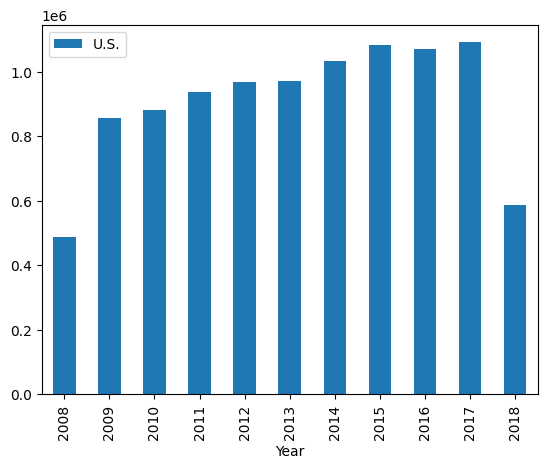

In [19]:
# Sadece 'U.S.' sütununu al ve bar grafiği çiz
plot = yearly_gas_df.filter(items=['U.S.']).plot(kind="bar")

# X eksenine 'Year' etiketi koyalım
plot.set_xlabel("Year");

<Axes: xlabel='Month'>

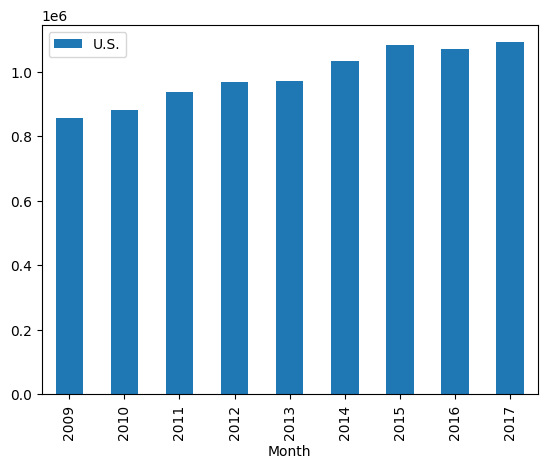

In [20]:
# 2008 ve 2018 yıllarını çıkarıyoruz
# Mantık: Index (Yıl) > 2008 VE Index (Yıl) < 2018 olsun
filtered_yearly_gas_df = yearly_gas_df[(yearly_gas_df.index > 2008) & (yearly_gas_df.index < 2018)]

# Şimdi temizlenmiş veriyi çizelim
filtered_yearly_gas_df.filter(items=['U.S.']).plot(kind='bar')

### Check your code

In [21]:
from nbresult import ChallengeResult

result = ChallengeResult('filtered_gas',
    yearly_gas=filtered_yearly_gas_df.shape
)
result.write()

print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/berkayturhan/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /Users/berkayturhan/data-us-oil-and-gas-production/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_filtered_gas.py::TestFilteredGas::test_yearly_gas_production_df_has_the_right_shape PASSED [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/filtered_gas.pickle

git commit -m 'Completed filtered_gas step'

git push origin master



## State production

Let's have a look at the yearly production of some specific states

In [22]:
# İlk sütun (U.S.) hariç diğerlerini al ve alfabetik sırala
filtered_yearly_gas_df.columns[1:].sort_values()

Index(['Alaska', 'Arkansas', 'California', 'Colorado',
       'Federal Offshore--Gulf of Mexico', 'Kansas', 'Louisiana', 'Montana',
       'New Mexico', 'North Dakota', 'Ohio', 'Oklahoma', 'Other States',
       'Pennsylvania', 'Texas', 'Utah', 'West Virginia', 'Wyoming'],
      dtype='object')

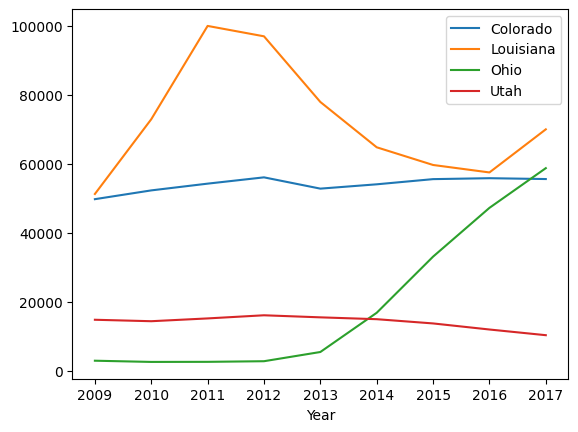

In [23]:
# Belirlediğimiz 4 eyaleti filtrele ve çiz
plot = filtered_yearly_gas_df.filter(items=['Colorado', 'Louisiana', 'Ohio', 'Utah']).plot()

# X eksenine 'Year' yazalım
plot.set_xlabel("Year");

## Comparing with Crude Oil Production

In [24]:
# Petrol verisini yüklüyoruz
# parse_dates=['Month'] diyerek tarihi otomatik tanımasını sağlıyoruz
file_oil = "data/U.S._crude_oil_production.csv"
oil_df = pd.read_csv(file_oil, decimal=",", parse_dates=['Month'])

# Bakalım tarih doğru gelmiş mi?
oil_df.head()

,Month,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
0,2008-06-01,5138,21,655,17,0,583,82,1326,67,...,14,186,8,5,144,6,0,60,1097,1
1,2008-07-01,5177,21,640,17,0,586,81,1372,61,...,14,184,8,5,145,5,0,61,1111,1
2,2008-08-01,5003,21,544,17,0,588,82,1272,70,...,14,188,8,5,145,6,0,62,1110,1
3,2008-09-01,3974,21,681,16,0,587,88,242,67,...,14,186,8,5,144,6,0,63,1055,1
4,2008-10-01,4738,21,716,17,0,586,86,803,66,...,14,185,8,5,145,6,0,64,1125,1


## Yearly Oil production

In [25]:
# Yıllara göre grupla ve topla
yearly_oil_df = oil_df.groupby(oil_df['Month'].dt.year).sum(numeric_only=True)

# Sütun isimlerini yazdır (Buraya çok dikkatli bak!)
print(yearly_oil_df.columns)

Index(['U.S. Crude Oil ', 'Alabama', 'Alaska', 'Arkansas', 'Arizona',
       'California', 'Colorado', 'Federal Offshore Gulf of Mexico Crude Oil',
       'Federal Offshore Pacific Crude Oil', 'Florida', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi',
       'Missouri', 'Nebraska', 'Montana', 'Nevada', 'New Mexico', 'New York',
       'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Dakota',
       'Wyoming', 'West Virginia', 'Virginia', 'Utah', 'Texas', 'Tennessee'],
      dtype='object')


In [26]:
# Yıllara göre grupla ve topla
yearly_oil_df = oil_df.groupby(oil_df['Month'].dt.year).sum(numeric_only=True)

# Sütun isimlerini yazdır (Buraya çok dikkatli bak!)
print(yearly_oil_df.columns)

Index(['U.S. Crude Oil ', 'Alabama', 'Alaska', 'Arkansas', 'Arizona',
       'California', 'Colorado', 'Federal Offshore Gulf of Mexico Crude Oil',
       'Federal Offshore Pacific Crude Oil', 'Florida', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi',
       'Missouri', 'Nebraska', 'Montana', 'Nevada', 'New Mexico', 'New York',
       'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Dakota',
       'Wyoming', 'West Virginia', 'Virginia', 'Utah', 'Texas', 'Tennessee'],
      dtype='object')


In [27]:
# Sadece 2008 ile 2018 arasındaki tam yılları al
filtered_yearly_oil_df = yearly_oil_df[(yearly_oil_df.index > 2008) & (yearly_oil_df.index < 2018)]

# Kontrol edelim
filtered_yearly_oil_df.shape

(9, 35)

In [28]:
from nbresult import ChallengeResult

result = ChallengeResult('oil',
    filtered_oil_shape=filtered_yearly_oil_df.shape,
    filtered_oil_index_year=filtered_yearly_oil_df.index[0],
    us_total=filtered_yearly_oil_df.iloc[0,0]
)
result.write()

print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/berkayturhan/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /Users/berkayturhan/data-us-oil-and-gas-production/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 3 items

test_oil.py::TestOil::test_df_has_the_right_index PASSED                 [ 33%]
test_oil.py::TestOil::test_df_has_the_right_shape PASSED                 [ 66%]
test_oil.py::TestOil::test_df_has_the_right_values PASSED                [100%]

============================== 3 passed in 0.12s ===============================


💯 You can commit your code:

git add tests/oil.pickle

git commit -m 'Completed oil step'

git push origin master



In [29]:
## Merging Oil and Gas Production

In [31]:
# 1. Önce sütun isimlerindeki boşlukları kesin olarak temizleyelim
filtered_yearly_oil_df.columns = filtered_yearly_oil_df.columns.str.strip()

# 2. Şimdi temiz isimle sütunu çekelim
total_oil = filtered_yearly_oil_df.filter(items=['U.S. Crude Oil'])

# 3. İsim değişikliğini yapalım (Artık hata vermemeli)
total_oil.columns = ['Crude Oil']

# 4. Gaz verisini de hazırlayalım
total_gas = filtered_yearly_gas_df.filter(items=['U.S.'])
total_gas.columns = ['Gas']

# 5. İkisini birleştirelim
merged_df = pd.concat([total_gas, total_oil], axis=1)

# Sonucu görelim
merged_df.head()

,Gas,Crude Oil
Month,,
2009,856876,64180
2010,881622,65741
2011,936163,67829
2012,968632,78007
2013,970617,89585


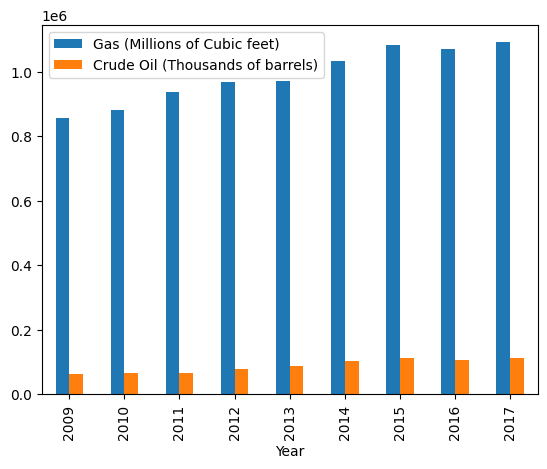

In [32]:
# Çubuk grafik çiziyoruz
plot = merged_df.plot(kind="bar")
plot.set_xlabel("Year")

# Efsane (Legend) kısmına birimlerini de yazalım
plot.legend(['Gas (Millions of Cubic feet)', 'Crude Oil (Thousands of barrels)']);

In [33]:
from nbresult import ChallengeResult

result = ChallengeResult('merged_dataframes',
    merged_df_shape=merged_df.shape,
    yearly_oil_2009=merged_df.iloc[0]["Crude Oil"],
)
result.write()

print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/berkayturhan/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /Users/berkayturhan/data-us-oil-and-gas-production/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 2 items

test_merged_dataframes.py::TestMergedDataframes::test_merged_df_has_the_right_shape PASSED [ 50%]
test_merged_dataframes.py::TestMergedDataframes::test_yearly_oil_value_2009 PASSED [100%]

============================== 2 passed in 0.14s ===============================


💯 You can commit your code:

git add tests/merged_dataframes.pickle

git commit -m 'Completed merged_dataframes step'

git push origin master

